In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
import datetime as dt
import string

from sklearn.impute import SimpleImputer

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error, mean_absolute_error, r2_score

from sklearn.manifold import TSNE

#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")
sns.set_context("talk")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 15000)
pd.set_option('display.max_colwidth', -1)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

/Users/abbieschindler/opt/anaconda3/envs/analysis/lib/python3.6/site-packages/ipykernel_launcher.py:29: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


### Get data (already processed in other nb)

In [2]:
#create list of dir paths
path = '/Users/abbieschindler/Downloads/CH01-2021-06-21-22-41-46_22-42-25DLC_resnet50_multitest_2.00Jul26shuffle1_50000_el_filtered.csv'
    
data = pd.read_csv(path)
data = pd.DataFrame(data = data)

#combine first three rows to make unique column names
data.columns = pd.DataFrame(data=data.iloc[0] + '_' + data.iloc[1] + '_' + data.iloc[2], columns=['name'])['name'].values

#remove liklihood columns
data = data[data.columns.drop(list(data.filter(regex='likelihood')))]

#drop rows and columns
data = data.drop([0,1,2], axis=0)

print(data.shape)
data.head()

(611, 49)


,individuals_bodyparts_coords,mouse2_nose_x,mouse2_nose_y,mouse2_leftear_x,mouse2_leftear_y,mouse2_rightear_x,mouse2_rightear_y,mouse2_shoulder_x,mouse2_shoulder_y,mouse2_spine1_x,mouse2_spine1_y,mouse2_spine2_x,mouse2_spine2_y,mouse2_spine3_x,mouse2_spine3_y,mouse2_spine4_x,mouse2_spine4_y,mouse2_tailbase_x,mouse2_tailbase_y,mouse2_tail1_x,mouse2_tail1_y,mouse2_tail2_x,mouse2_tail2_y,mouse2_tailend_x,mouse2_tailend_y,mouse3_nose_x,mouse3_nose_y,mouse3_leftear_x,mouse3_leftear_y,mouse3_rightear_x,mouse3_rightear_y,mouse3_shoulder_x,mouse3_shoulder_y,mouse3_spine1_x,mouse3_spine1_y,mouse3_spine2_x,mouse3_spine2_y,mouse3_spine3_x,mouse3_spine3_y,mouse3_spine4_x,mouse3_spine4_y,mouse3_tailbase_x,mouse3_tailbase_y,mouse3_tail1_x,mouse3_tail1_y,mouse3_tail2_x,mouse3_tail2_y,mouse3_tailend_x,mouse3_tailend_y
3,0,0,0,682.446,639.969,675.186,675.339,676.579,655.779,663.883,646.091,648.845,636.245,633.284,621.231,616.219,605.134,599.633,603.15,580.903,644.844,NaN,NaN,NaN,NaN,NaN,NaN,681.81,250.7,686.38,296.891,682.153,277.249,667.551,283.273,653.143,290.396,637.22,297.118,621.886,307,606.883,315.147,570.502,358.735,551.385,421.288,557.239,475.335
4,1,680.701,713.553,684.698,661.163,675.186,693.503,678.473,671.433,667.118,653.053,655.092,637.608,640.974,621.31,620.502,607.205,605.799,603.15,597.462,644.844,NaN,NaN,NaN,NaN,NaN,NaN,682.893,250.7,686.38,296.891,682.153,277.249,668.613,283.273,654.601,290.396,638.734,297.118,624.38,307,608.073,315.147,570.823,358.735,551.532,421.288,557.309,475.335
5,2,680.701,713.553,684.698,684.072,675.186,708.609,678.473,686.708,668.468,660.259,661.484,641.695,647.206,623.52,631.894,609.908,613.257,603.15,604.925,648.53,NaN,NaN,NaN,NaN,NaN,NaN,682.893,250.7,686.38,296.891,682.153,277.249,668.613,283.273,654.601,290.396,638.734,297.118,624.38,307,608.073,315.147,570.823,358.735,552.588,421.288,557.958,475.439
6,3,NaN,NaN,684.468,700.278,674.407,717.364,678.473,693.492,674.824,678.534,666.092,651.929,658.507,634.385,645.25,611.698,627.377,603.15,620.675,648.53,NaN,NaN,NaN,NaN,NaN,NaN,682.893,249.457,685.873,294.374,681.834,273.364,668.613,279.316,654.601,289.433,638.734,293.957,624.38,306.328,608.073,314.865,570.823,358.209,552.73,419.005,557.958,475.439
7,4,675.812,716.461,684.468,700.278,670.174,720.383,676.947,699.778,675.358,684.237,675.445,652.528,660.604,650.476,652.881,619.736,627.662,603.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,678.672,246.64,682.863,291.173,678.736,271.523,663.688,275.147,650.088,282.949,637.49,290.264,621.163,299.956,607.925,312.511,571.129,358.095,552.73,418.944,557.958,475.439


In [3]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data_full = pd.DataFrame(data=imp_mean.fit_transform(data), columns=data.columns)

data_full.columns.values

array(['individuals_bodyparts_coords', 'mouse2_nose_x', 'mouse2_nose_y',
       'mouse2_leftear_x', 'mouse2_leftear_y', 'mouse2_rightear_x',
       'mouse2_rightear_y', 'mouse2_shoulder_x', 'mouse2_shoulder_y',
       'mouse2_spine1_x', 'mouse2_spine1_y', 'mouse2_spine2_x',
       'mouse2_spine2_y', 'mouse2_spine3_x', 'mouse2_spine3_y',
       'mouse2_spine4_x', 'mouse2_spine4_y', 'mouse2_tailbase_x',
       'mouse2_tailbase_y', 'mouse2_tail1_x', 'mouse2_tail1_y',
       'mouse2_tail2_x', 'mouse2_tail2_y', 'mouse2_tailend_x',
       'mouse2_tailend_y', 'mouse3_nose_x', 'mouse3_nose_y',
       'mouse3_leftear_x', 'mouse3_leftear_y', 'mouse3_rightear_x',
       'mouse3_rightear_y', 'mouse3_shoulder_x', 'mouse3_shoulder_y',
       'mouse3_spine1_x', 'mouse3_spine1_y', 'mouse3_spine2_x',
       'mouse3_spine2_y', 'mouse3_spine3_x', 'mouse3_spine3_y',
       'mouse3_spine4_x', 'mouse3_spine4_y', 'mouse3_tailbase_x',
       'mouse3_tailbase_y', 'mouse3_tail1_x', 'mouse3_tail1_y',
       'mou

### Determine cluster number

In [4]:
data_feat = data_full[[
       'mouse2_leftear_x', 'mouse2_leftear_y',  
       'mouse3_leftear_x', 'mouse3_leftear_y']]

# center and scale the data
scaler = StandardScaler()
#scaler = RobustScaler()

data_feat_scaled = scaler.fit_transform(data_feat)
data_feat_scaled

array([[ 1.80175305, -5.0200005 ,  0.36490308, -0.07465531],
       [ 2.0474833 , -4.64017773,  0.4616739 , -0.07465531],
       [ 2.0474833 , -4.22962003,  0.4616739 , -0.07465531],
       ...,
       [ 0.7979908 ,  0.49235799, -0.24136659, -0.07559464],
       [ 0.7979908 ,  0.49235799, -0.26424131, -0.09644446],
       [ 0.7979908 ,  0.48284182, -0.31955169, -0.10060436]])

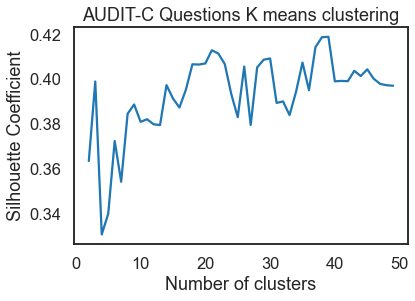

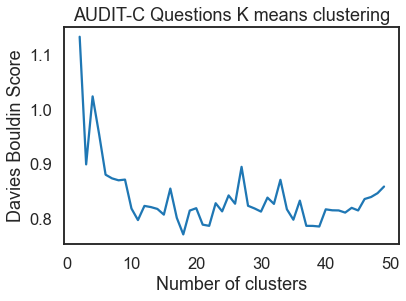

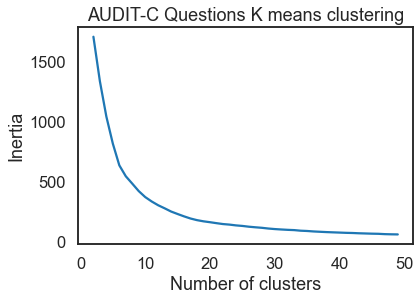

In [5]:
data = data_feat_scaled

#pick cluster number based on silhouette coefficient
k_range = range(2,50)

base_scores = []
sil_scores = []
db_scores = []
ch_scores = []
mse_scores = []

for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=39)
    km_ss.fit(data)
    
    sil_scores.append(silhouette_score(data, km_ss.labels_))
    db_scores.append(davies_bouldin_score(data, km_ss.labels_))
    #ch_scores.append(calinski_harabasz_score(data, km_ss.labels_))
    mse_scores.append(km_ss.inertia_)
    
# plot the results
plt.plot(k_range, sil_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

# plot the results
plt.plot(k_range, db_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()
    
# plot the results
plt.plot(k_range, mse_scores)
plt.title('AUDIT-C Questions K means clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

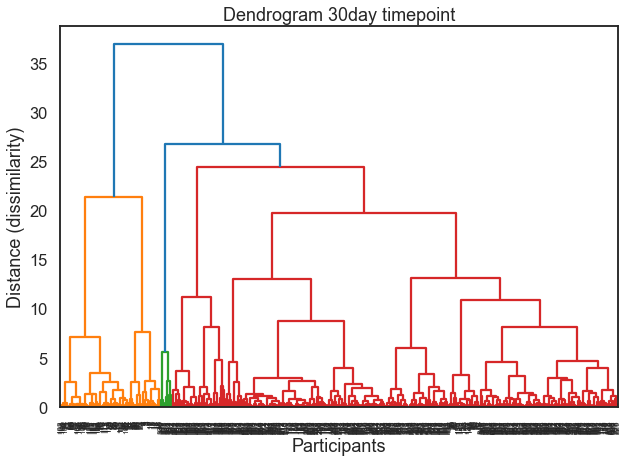

In [6]:
#viz dendrogram to find if three clusters makes sense
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram 30day timepoint")  
plt.ylabel("Distance (dissimilarity)")
plt.xlabel("Participants")
dend = shc.dendrogram(shc.linkage(data_feat_scaled, method='ward'), 
                      distance_sort='ascending',
                      show_leaf_counts=True, leaf_font_size=8)

In [7]:
#choose k=3 clusters and fit data
km_3 = KMeans(n_clusters=3,random_state=39)
km_3.fit(data_feat_scaled)
#add cluster info to df
data_full['kmeans_cluster'] = ["cluster_" + str(label) for label in km_3.labels_ ]
print(data_full.shape)
print(data_full['kmeans_cluster'].value_counts())
data_full.head(1)

(611, 50)
cluster_0    447
cluster_1    148
cluster_2    16 
Name: kmeans_cluster, dtype: int64


,individuals_bodyparts_coords,mouse2_nose_x,mouse2_nose_y,mouse2_leftear_x,mouse2_leftear_y,mouse2_rightear_x,mouse2_rightear_y,mouse2_shoulder_x,mouse2_shoulder_y,mouse2_spine1_x,mouse2_spine1_y,mouse2_spine2_x,mouse2_spine2_y,mouse2_spine3_x,mouse2_spine3_y,mouse2_spine4_x,mouse2_spine4_y,mouse2_tailbase_x,mouse2_tailbase_y,mouse2_tail1_x,mouse2_tail1_y,mouse2_tail2_x,mouse2_tail2_y,mouse2_tailend_x,mouse2_tailend_y,mouse3_nose_x,mouse3_nose_y,mouse3_leftear_x,mouse3_leftear_y,mouse3_rightear_x,mouse3_rightear_y,mouse3_shoulder_x,mouse3_shoulder_y,mouse3_spine1_x,mouse3_spine1_y,mouse3_spine2_x,mouse3_spine2_y,mouse3_spine3_x,mouse3_spine3_y,mouse3_spine4_x,mouse3_spine4_y,mouse3_tailbase_x,mouse3_tailbase_y,mouse3_tail1_x,mouse3_tail1_y,mouse3_tail2_x,mouse3_tail2_y,mouse3_tailend_x,mouse3_tailend_y,kmeans_cluster
0,0.0,0.0,0.0,682.446,639.969,675.186,675.339,676.579,655.779,663.883,646.091,648.845,636.245,633.284,621.231,616.219,605.134,599.633,603.15,580.903,644.844,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,681.81,250.7,686.38,296.891,682.153,277.249,667.551,283.273,653.143,290.396,637.22,297.118,621.886,307.0,606.883,315.147,570.502,358.735,551.385,421.288,557.239,475.335,cluster_1


In [14]:
tsne = TSNE(n_components=2, perplexity=50, random_state=1234)
tsne_features = tsne.fit_transform(data_feat_scaled)

print(tsne_features.shape)
tsne_df = pd.DataFrame(data = tsne_features, columns = ['tsne_0', 'tsne_1'], index = data_full.index)
data_full_TSNE = pd.concat([data_full, tsne_df], axis = 1)

data_full_TSNE.head()

(611, 2)


,individuals_bodyparts_coords,mouse2_nose_x,mouse2_nose_y,mouse2_leftear_x,mouse2_leftear_y,mouse2_rightear_x,mouse2_rightear_y,mouse2_shoulder_x,mouse2_shoulder_y,mouse2_spine1_x,mouse2_spine1_y,mouse2_spine2_x,mouse2_spine2_y,mouse2_spine3_x,mouse2_spine3_y,mouse2_spine4_x,mouse2_spine4_y,mouse2_tailbase_x,mouse2_tailbase_y,mouse2_tail1_x,mouse2_tail1_y,mouse2_tail2_x,mouse2_tail2_y,mouse2_tailend_x,mouse2_tailend_y,mouse3_nose_x,mouse3_nose_y,mouse3_leftear_x,mouse3_leftear_y,mouse3_rightear_x,mouse3_rightear_y,mouse3_shoulder_x,mouse3_shoulder_y,mouse3_spine1_x,mouse3_spine1_y,mouse3_spine2_x,mouse3_spine2_y,mouse3_spine3_x,mouse3_spine3_y,mouse3_spine4_x,mouse3_spine4_y,mouse3_tailbase_x,mouse3_tailbase_y,mouse3_tail1_x,mouse3_tail1_y,mouse3_tail2_x,mouse3_tail2_y,mouse3_tailend_x,mouse3_tailend_y,kmeans_cluster,tsne_0,tsne_1
0,0.0,0.000000,0.000000,682.446,639.969,675.186,675.339,676.579,655.779,663.883,646.091,648.845,636.245,633.284,621.231,616.219,605.134,599.633,603.15,580.903000,644.844000,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,681.810,250.700,686.380,296.891,682.153,277.249,667.551,283.273,653.143,290.396,637.220,297.118,621.886,307.000,606.883,315.147,570.502,358.735,551.385,421.288,557.239,475.335,cluster_1,23.144602,-9.931231
1,1.0,680.701000,713.553000,684.698,661.163,675.186,693.503,678.473,671.433,667.118,653.053,655.092,637.608,640.974,621.310,620.502,607.205,605.799,603.15,597.462000,644.844000,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,682.893,250.700,686.380,296.891,682.153,277.249,668.613,283.273,654.601,290.396,638.734,297.118,624.380,307.000,608.073,315.147,570.823,358.735,551.532,421.288,557.309,475.335,cluster_1,22.844509,-10.122350
2,2.0,680.701000,713.553000,684.698,684.072,675.186,708.609,678.473,686.708,668.468,660.259,661.484,641.695,647.206,623.520,631.894,609.908,613.257,603.15,604.925000,648.530000,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,682.893,250.700,686.380,296.891,682.153,277.249,668.613,283.273,654.601,290.396,638.734,297.118,624.380,307.000,608.073,315.147,570.823,358.735,552.588,421.288,557.958,475.439,cluster_1,22.759207,-9.885659
3,3.0,661.939209,912.955649,684.468,700.278,674.407,717.364,678.473,693.492,674.824,678.534,666.092,651.929,658.507,634.385,645.250,611.698,627.377,603.15,620.675000,648.530000,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,682.893,249.457,685.873,294.374,681.834,273.364,668.613,279.316,654.601,289.433,638.734,293.957,624.380,306.328,608.073,314.865,570.823,358.209,552.730,419.005,557.958,475.439,cluster_1,22.728149,-9.511374
4,4.0,675.812000,716.461000,684.468,700.278,670.174,720.383,676.947,699.778,675.358,684.237,675.445,652.528,660.604,650.476,652.881,619.736,627.662,603.15,613.043762,823.075172,601.094781,799.373703,592.197093,755.770558,668.459192,331.903452,678.672,246.640,682.863,291.173,678.736,271.523,663.688,275.147,650.088,282.949,637.490,290.264,621.163,299.956,607.925,312.511,571.129,358.095,552.730,418.944,557.958,475.439,cluster_1,22.592937,-9.195097


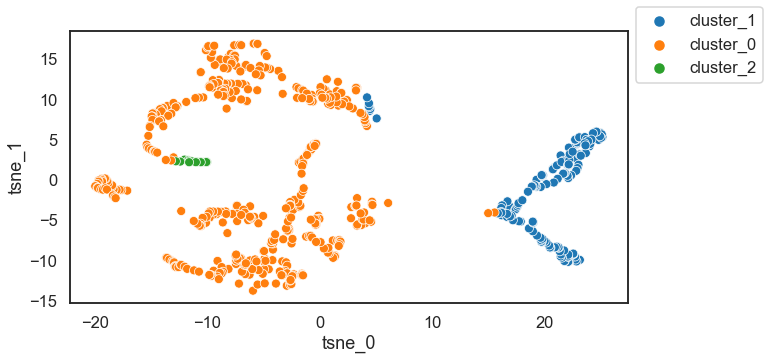

In [15]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='tsne_0', y='tsne_1', data=data_full_TSNE, hue='kmeans_cluster')
plt.legend(loc='center left', bbox_to_anchor=(1, .95))

In [16]:
data_full.columns.values

array(['individuals_bodyparts_coords', 'mouse2_nose_x', 'mouse2_nose_y',
       'mouse2_leftear_x', 'mouse2_leftear_y', 'mouse2_rightear_x',
       'mouse2_rightear_y', 'mouse2_shoulder_x', 'mouse2_shoulder_y',
       'mouse2_spine1_x', 'mouse2_spine1_y', 'mouse2_spine2_x',
       'mouse2_spine2_y', 'mouse2_spine3_x', 'mouse2_spine3_y',
       'mouse2_spine4_x', 'mouse2_spine4_y', 'mouse2_tailbase_x',
       'mouse2_tailbase_y', 'mouse2_tail1_x', 'mouse2_tail1_y',
       'mouse2_tail2_x', 'mouse2_tail2_y', 'mouse2_tailend_x',
       'mouse2_tailend_y', 'mouse3_nose_x', 'mouse3_nose_y',
       'mouse3_leftear_x', 'mouse3_leftear_y', 'mouse3_rightear_x',
       'mouse3_rightear_y', 'mouse3_shoulder_x', 'mouse3_shoulder_y',
       'mouse3_spine1_x', 'mouse3_spine1_y', 'mouse3_spine2_x',
       'mouse3_spine2_y', 'mouse3_spine3_x', 'mouse3_spine3_y',
       'mouse3_spine4_x', 'mouse3_spine4_y', 'mouse3_tailbase_x',
       'mouse3_tailbase_y', 'mouse3_tail1_x', 'mouse3_tail1_y',
       'mou

In [17]:
data_melt = pd.melt(data_full, id_vars=['individuals_bodyparts_coords', 'kmeans_cluster'], 
                    value_vars=['mouse2_leftear_x', 'mouse2_leftear_y',  
       'mouse3_leftear_x', 'mouse3_leftear_y'])

data_melt.head()

,individuals_bodyparts_coords,kmeans_cluster,variable,value
0,0.0,cluster_1,mouse2_leftear_x,682.446
1,1.0,cluster_1,mouse2_leftear_x,684.698
2,2.0,cluster_1,mouse2_leftear_x,684.698
3,3.0,cluster_1,mouse2_leftear_x,684.468
4,4.0,cluster_1,mouse2_leftear_x,684.468


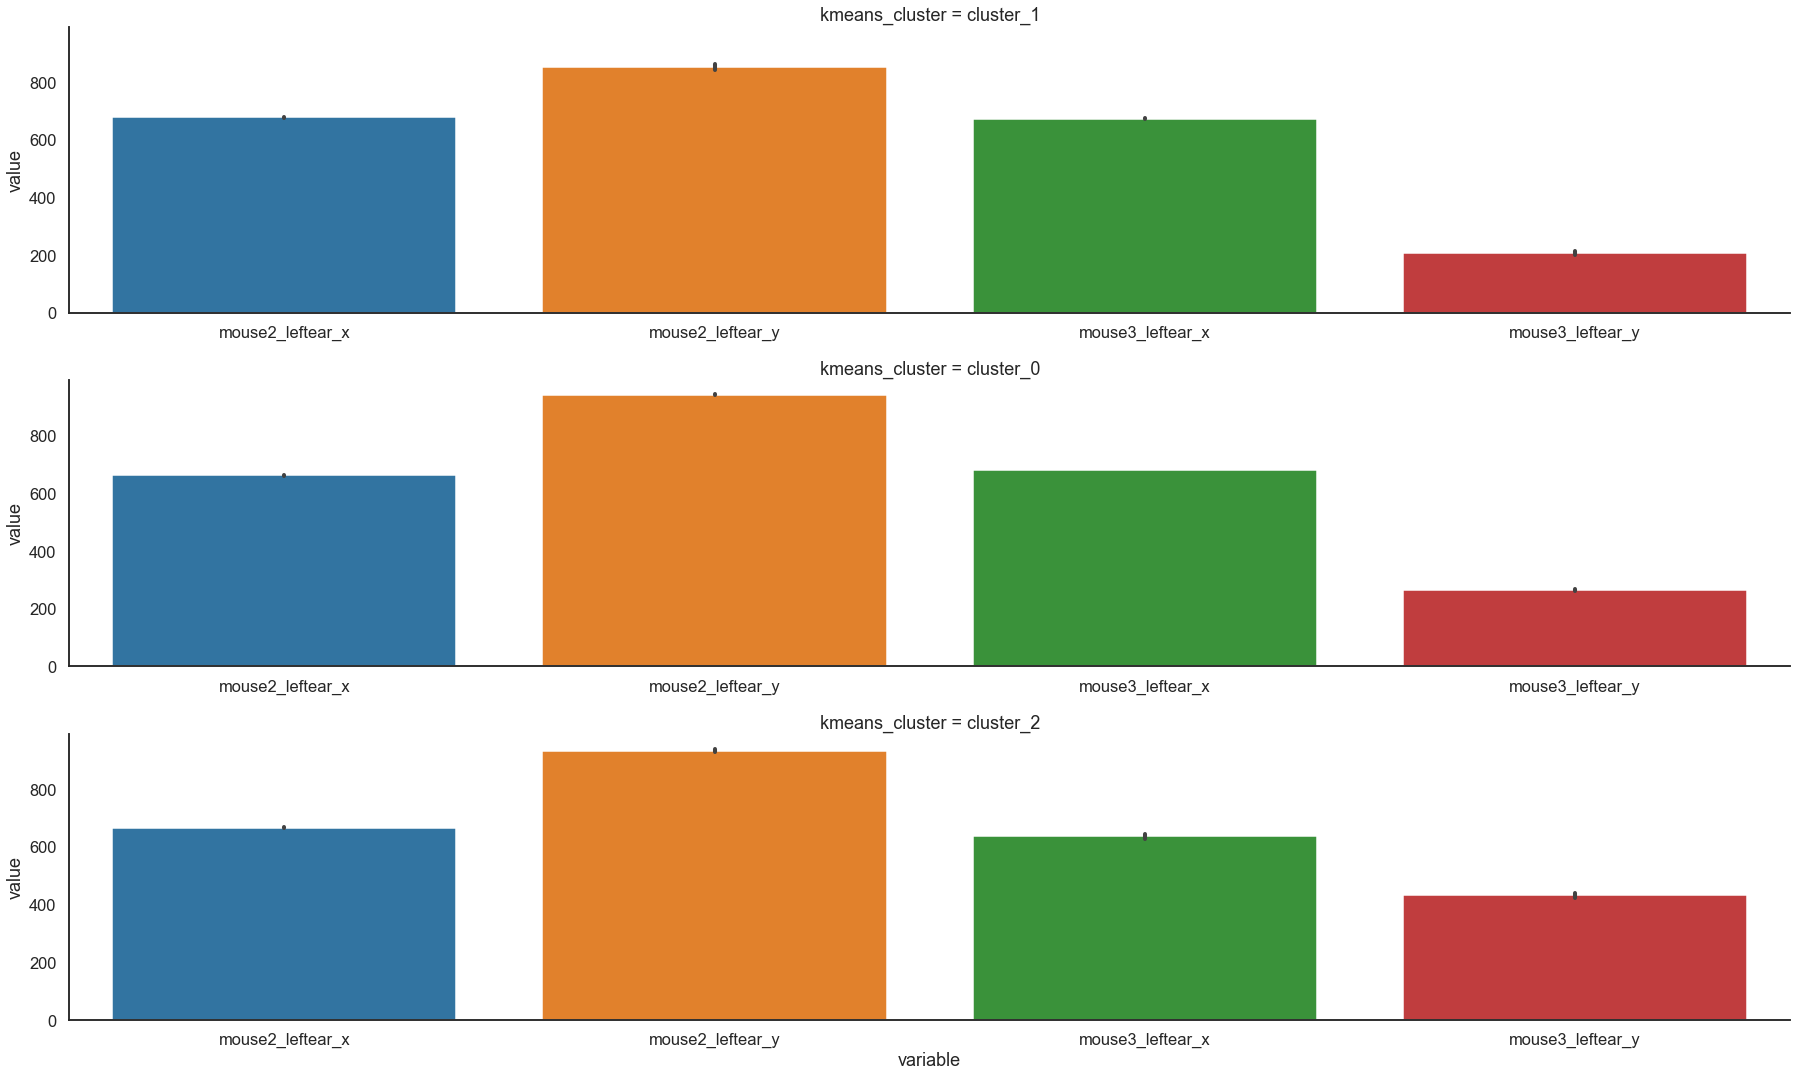

In [18]:
g = sns.catplot(x="variable", y="value", col='kmeans_cluster', col_wrap=1, height=5, aspect=5,
                kind="bar", data=data_melt, sharex=False)

